In [1]:
from sklearn.linear_model import ARDRegression, BayesianRidge, ElasticNet

from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction import DictVectorizer as DV

from optimizer import bayes_opt

from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/Users/maxim/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
import pandas as pd
import numpy as np


import pickle
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)



In [3]:
from sklearn.metrics import accuracy_score
true = pd.read_csv("true_ans.csv")
y_test = true["Survived"].values
def get_ac(ans):
    return accuracy_score(ans, true["Survived"])

In [4]:
data_train = pd.read_pickle("../preprocessing/filled_train.pk")
data_test = pd.read_pickle("../preprocessing/filled_test.pk")

target = np.array(data_train["Survived"])

In [5]:
data_train.drop(columns = ["Survived", "PassengerId"], inplace= True)

In [88]:
real_columns = ['Age', 'Fare', "number_of_cabin", "ticket"]
cat_columns = ["Embarked","SibSp", "Parch", 'Pclass','Sex', "Deck", "first_name", "title"]

In [89]:
from collections import Counter
import random
a = list(dict(Counter(data_test["title"])).keys())
idx = data_train.indexidx= []
for row in data_train.iterrows():

    if row[1]["title"] in a:
        idx.append(row[0])
random.shuffle(idx)



In [90]:
data_train["Embarked"] = data_train["Embarked"].fillna("S")
data_test["Embarked"] = data_test["Embarked"].fillna("S")

In [91]:
X_train, X_test, y_train, y_test = data_train.iloc[idx][cat_columns + real_columns], data_test[cat_columns + real_columns], target[idx], true["Survived"] 

In [92]:
encoder_1 = DV(sparse = False)
data_cat_oh = encoder_1.fit_transform(X_train[cat_columns].T.to_dict().values())

X_train_n = np.concatenate((X_train[real_columns].values, data_cat_oh), axis = 1)


data_cat_oh = encoder_1.transform(X_test[cat_columns].T.to_dict().values())
X_test_n = np.concatenate((X_test[real_columns].values, data_cat_oh), axis = 1)

In [93]:
models = [
    GradientBoostingClassifier,
    CatBoostClassifier,
    XGBClassifier,
    KNeighborsClassifier, 
    LGBMClassifier, 
    
    RidgeClassifier, 

]

In [94]:
pbounds = {
    XGBClassifier : {"max_depth":(1, 10),
    "learning_rate":(0.00001, 0.8),
    "n_estimators":(80, 200),    
    "min_child_weight":(1, 10),
    "max_delta_step": (1, 10),

    "reg_alpha" : (0., 10.),
    "reg_lambda": (0., 10.),
    "scale_pos_weight": (0., 10.),
    "base_score": (0.01, 0.99)
    }, 
    
    GradientBoostingClassifier:{"learning_rate":(0.001, 0.1),
    "n_estimators":(50, 200),
    "subsample":(0.0001, 1.0),
    "min_samples_split":(2, 5),
    "min_samples_leaf":(1, 5),
    "min_weight_fraction_leaf":(0.0, 0.5),
    "max_depth":(1, 10),
    "min_impurity_decrease":(0.0, 10),
    },
    CatBoostClassifier : {
    'iterations' : (800, 2000),
    'depth': (4, 4),
    'l2_leaf_reg': (1e-3, 1e2),
    'random_strength': (1e-2, 10),
    'bagging_temperature': (0, 10),
    "learning_rate" : (0.0001, 0.05),
    "model_size_reg" :(1e-2, 10),
    'max_ctr_complexity' : (4, 15)
    
},
    KNeighborsClassifier : {"n_neighbors":(1, 10),
           "leaf_size" :(10, 50),
           "p" : (1, 10),
    }, 
    LGBMClassifier : {"num_leaves": (10, 50),
    "max_depth": (10, 90),
    "learning_rate" : (0.001, 0.5),
    "n_estimators": (50, 200), 
       "reg_alpha": (0.0, 1.),
    "reg_lambda" : (0.0, 1.),
    }, 
    
    RidgeClassifier : {"alpha" : (0., 10.0)
    }, 

    
}

In [95]:
tp = {
    GradientBoostingClassifier : "num",
    CatBoostClassifier : "cat",
    XGBClassifier : "num",
    KNeighborsClassifier : "num", 
    LGBMClassifier : "num", 
    
    RidgeClassifier : "num", 

}

In [96]:
names_d = {
    GradientBoostingClassifier : "grad boost",
    CatBoostClassifier : "catboost",
    XGBClassifier : "xgb",
    KNeighborsClassifier : "knn", 
    LGBMClassifier : "lgm", 
    
    RidgeClassifier : "ridge", 

}

In [103]:
models_dict = {
    GradientBoostingClassifier : 2,
    CatBoostClassifier: 2,
    XGBClassifier: 3,
#      KNeighborsClassifier: 1, 
    LGBMClassifier : 3, 
    
#      RidgeClassifier : 2, 
}

In [98]:
av_params = {

    CatBoostClassifier : {
        "class_weights" : [1, 0.8], 
        "verbose" : 0
    }, 
    LGBMClassifier : {
        "class_weight" : {0 : 1, 1: 0.8}}, 

}

In [99]:
params = {}
for model in models:
    params[model] = []
    tpe = []
    for key in pbounds[model].keys():
        if type(pbounds[model][key][0]) == int or  type(pbounds[model][key][1]) == int:
            tpe.append(key)
    if tp[model] == "num":
        a = bayes_opt(model, pd.DataFrame(X_train_n), y_train, cv = 3, pbounds = pbounds[model], 
                  tp = tpe, 
                 n_iter= 40, init_points= 3, av_params=av_params)
    else:
        a = bayes_opt(model, X_train, y_train, cv = 3, pbounds = pbounds[model], 
                  tp = tpe, 
                 n_iter= 40, init_points= 3, cat_columns = cat_columns, av_params=av_params)
    tar = []
    for item in a.results:
        tar.append(item["target"])
    tar.sort()
    treshold = tar[-7]
    param = []
    for item in a.results:
        if item["target"] > treshold:
            param = item["params"]
            for key in param.keys():
                if key in tpe:
                    param[key] = int(param[key])
            params[model].append(param)
save_obj(params, "params3")

{'learning_rate': 0.096735954062354, 'n_estimators': 196, 'subsample': 0.006329632179069404, 'min_samples_split': 4, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.10804474779018819, 'max_depth': 5, 'min_impurity_decrease': 9}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.096735954062354, 'loss': 'deviance', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 9, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.10804474779018819, 'n_estimators': 196, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 0.006329632179069404, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.096735954062354, 'loss': 'deviance', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 9, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_sample

{'learning_rate': 0.028088994961906866, 'n_estimators': 50, 'subsample': 0.633933880175242, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.11772889638824757, 'max_depth': 9, 'min_impurity_decrease': 1}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.028088994961906866, 'loss': 'deviance', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 1, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.11772889638824757, 'n_estimators': 50, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 0.633933880175242, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.028088994961906866, 'loss': 'deviance', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 1, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_sampl

{'learning_rate': 0.1, 'n_estimators': 137, 'subsample': 0.0001, 'min_samples_split': 5, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'max_depth': 1, 'min_impurity_decrease': 0}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 137, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 0.0001, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 137, 'n_iter_no_change': None, 'presort'

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.5, 'n_estimators': 150, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.5, 'n_estimators': 150, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'learning_rate': 0.001, 'n_estimators': 85, 'subsample': 

{'learning_rate': 0.1, 'n_estimators': 50, 'subsample': 0.0001, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.5, 'max_depth': 10, 'min_impurity_decrease': 0}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.5, 'n_estimators': 50, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 0.0001, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.5, 'n_estimators': 50, 'n_iter_no_change': None, 'presort'

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.5, 'n_estimators': 131, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.5, 'n_estimators': 131, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'learning_rate': 0.001, 'n_estimators': 60, 'subsample': 

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 82, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'learning_rate': 0.001, 'n_estimators': 50, 'subsample': 1.0, 'min_samples_split': 2, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_depth': 1, 'min_impurity_decrease': 10}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 10, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'presort'

{'learning_rate': 0.1, 'n_estimators': 101, 'subsample': 0.0001, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'max_depth': 1, 'min_impurity_decrease': 0}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 101, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 0.0001, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 101, 'n_iter_no_change': None, 'presort'

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.5, 'n_estimators': 190, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.5, 'n_estimators': 190, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'iterations': 1967, 'depth': 4, 'l2_leaf_reg': 71.4818845

{'iterations': 1086, 'learning_rate': 0.034029660428140575, 'depth': 4, 'l2_leaf_reg': 0.6785779545457066, 'model_size_reg': 8, 'verbose': 0, 'max_ctr_complexity': 5, 'class_weights': [1, 0.8], 'random_strength': 0, 'bagging_temperature': 9}
{'iterations': 1568, 'depth': 4, 'l2_leaf_reg': 80.9777627322712, 'random_strength': 9, 'bagging_temperature': 9, 'learning_rate': 0.03714896850558224, 'model_size_reg': 9, 'max_ctr_complexity': 4, 'class_weights': [1, 0.8], 'verbose': 0}
{'iterations': 1568, 'learning_rate': 0.03714896850558224, 'depth': 4, 'l2_leaf_reg': 80.9777627322712, 'model_size_reg': 9, 'verbose': 0, 'max_ctr_complexity': 4, 'class_weights': [1, 0.8], 'random_strength': 9, 'bagging_temperature': 9}
{'iterations': 1568, 'learning_rate': 0.03714896850558224, 'depth': 4, 'l2_leaf_reg': 80.9777627322712, 'model_size_reg': 9, 'verbose': 0, 'max_ctr_complexity': 4, 'class_weights': [1, 0.8], 'random_strength': 9, 'bagging_temperature': 9}
{'iterations': 1568, 'learning_rate': 0.0

{'iterations': 801, 'learning_rate': 0.02597736567109794, 'depth': 4, 'l2_leaf_reg': 98.06190520667175, 'model_size_reg': 9, 'verbose': 0, 'max_ctr_complexity': 5, 'class_weights': [1, 0.8], 'random_strength': 8, 'bagging_temperature': 8}
{'iterations': 801, 'learning_rate': 0.02597736567109794, 'depth': 4, 'l2_leaf_reg': 98.06190520667175, 'model_size_reg': 9, 'verbose': 0, 'max_ctr_complexity': 5, 'class_weights': [1, 0.8], 'random_strength': 8, 'bagging_temperature': 8}
{'iterations': 801, 'learning_rate': 0.02597736567109794, 'depth': 4, 'l2_leaf_reg': 98.06190520667175, 'model_size_reg': 9, 'verbose': 0, 'max_ctr_complexity': 5, 'class_weights': [1, 0.8], 'random_strength': 8, 'bagging_temperature': 8}
{'iterations': 1873, 'depth': 4, 'l2_leaf_reg': 85.71239654643053, 'random_strength': 0, 'bagging_temperature': 9, 'learning_rate': 0.020113734639560753, 'model_size_reg': 0, 'max_ctr_complexity': 13, 'class_weights': [1, 0.8], 'verbose': 0}
{'iterations': 1873, 'learning_rate': 0.0

{'iterations': 1683, 'learning_rate': 0.030687269409792765, 'depth': 4, 'l2_leaf_reg': 96.14820470416036, 'model_size_reg': 0, 'verbose': 0, 'max_ctr_complexity': 4, 'class_weights': [1, 0.8], 'random_strength': 8, 'bagging_temperature': 9}
{'iterations': 1208, 'depth': 4, 'l2_leaf_reg': 2.4005789660990002, 'random_strength': 0, 'bagging_temperature': 9, 'learning_rate': 0.004719174734024968, 'model_size_reg': 7, 'max_ctr_complexity': 4, 'class_weights': [1, 0.8], 'verbose': 0}
{'iterations': 1208, 'learning_rate': 0.004719174734024968, 'depth': 4, 'l2_leaf_reg': 2.4005789660990002, 'model_size_reg': 7, 'verbose': 0, 'max_ctr_complexity': 4, 'class_weights': [1, 0.8], 'random_strength': 0, 'bagging_temperature': 9}
{'iterations': 1208, 'learning_rate': 0.004719174734024968, 'depth': 4, 'l2_leaf_reg': 2.4005789660990002, 'model_size_reg': 7, 'verbose': 0, 'max_ctr_complexity': 4, 'class_weights': [1, 0.8], 'random_strength': 0, 'bagging_temperature': 9}
{'iterations': 1208, 'learning_ra

{'iterations': 1963, 'learning_rate': 0.029614951077340905, 'depth': 4, 'l2_leaf_reg': 33.273872513697455, 'model_size_reg': 9, 'verbose': 0, 'max_ctr_complexity': 14, 'class_weights': [1, 0.8], 'random_strength': 9, 'bagging_temperature': 0}
{'iterations': 1963, 'learning_rate': 0.029614951077340905, 'depth': 4, 'l2_leaf_reg': 33.273872513697455, 'model_size_reg': 9, 'verbose': 0, 'max_ctr_complexity': 14, 'class_weights': [1, 0.8], 'random_strength': 9, 'bagging_temperature': 0}
{'iterations': 1963, 'learning_rate': 0.029614951077340905, 'depth': 4, 'l2_leaf_reg': 33.273872513697455, 'model_size_reg': 9, 'verbose': 0, 'max_ctr_complexity': 14, 'class_weights': [1, 0.8], 'random_strength': 9, 'bagging_temperature': 0}
{'iterations': 1654, 'depth': 4, 'l2_leaf_reg': 0.9291797846501645, 'random_strength': 7, 'bagging_temperature': 0, 'learning_rate': 0.013564187980914279, 'model_size_reg': 0, 'max_ctr_complexity': 4, 'class_weights': [1, 0.8], 'verbose': 0}
{'iterations': 1654, 'learnin

{'iterations': 1942, 'learning_rate': 0.023899873841233862, 'depth': 4, 'l2_leaf_reg': 98.40072977610261, 'model_size_reg': 8, 'verbose': 0, 'max_ctr_complexity': 14, 'class_weights': [1, 0.8], 'random_strength': 1, 'bagging_temperature': 1}
{'iterations': 1771, 'depth': 4, 'l2_leaf_reg': 0.6947468337258262, 'random_strength': 3, 'bagging_temperature': 8, 'learning_rate': 0.02043273247859345, 'model_size_reg': 0, 'max_ctr_complexity': 12, 'class_weights': [1, 0.8], 'verbose': 0}
{'iterations': 1771, 'learning_rate': 0.02043273247859345, 'depth': 4, 'l2_leaf_reg': 0.6947468337258262, 'model_size_reg': 0, 'verbose': 0, 'max_ctr_complexity': 12, 'class_weights': [1, 0.8], 'random_strength': 3, 'bagging_temperature': 8}
{'iterations': 1771, 'learning_rate': 0.02043273247859345, 'depth': 4, 'l2_leaf_reg': 0.6947468337258262, 'model_size_reg': 0, 'verbose': 0, 'max_ctr_complexity': 12, 'class_weights': [1, 0.8], 'random_strength': 3, 'bagging_temperature': 8}
{'iterations': 1771, 'learning_r

{'max_depth': 10, 'learning_rate': 0.8, 'n_estimators': 138, 'min_child_weight': 1, 'max_delta_step': 10, 'reg_alpha': 0.0, 'reg_lambda': 10.0, 'scale_pos_weight': 10.0, 'base_score': 0.01}
{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 10, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 138, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 10.0, 'scale_pos_weight': 10.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 10, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 138, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda'

{'base_score': 0.99, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 1e-05, 'max_delta_step': 10, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 200, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'scale_pos_weight': 10.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'base_score': 0.99, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 1e-05, 'max_delta_step': 10, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 200, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'scale_pos_weight': 10.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'max_depth': 1, 'learning_rate': 0.8, 'n_estimators': 102, 'min_child_weight': 1, 'max_delt

{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 1, 'max_depth': 1, 'min_child_weight': 1, 'missing': None, 'n_estimators': 173, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'scale_pos_weight': 10.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'max_depth': 1, 'learning_rate': 0.8, 'n_estimators': 200, 'min_child_weight': 10, 'max_delta_step': 1, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'scale_pos_weight': 0.0, 'base_score': 0.01}
{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 1, 'max_depth': 1, 'min_child_weight': 10, 'missing': None, 'n_estimators': 200, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 

{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 10, 'max_depth': 1, 'min_child_weight': 10, 'missing': None, 'n_estimators': 181, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 10.0, 'reg_lambda': 0.0, 'scale_pos_weight': 0.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 10, 'max_depth': 1, 'min_child_weight': 10, 'missing': None, 'n_estimators': 181, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 10.0, 'reg_lambda': 0.0, 'scale_pos_weight': 0.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsam

{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 1, 'max_depth': 1, 'min_child_weight': 1, 'missing': None, 'n_estimators': 147, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 10.0, 'scale_pos_weight': 10.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'max_depth': 10, 'learning_rate': 0.8, 'n_estimators': 128, 'min_child_weight': 10, 'max_delta_step': 1, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'scale_pos_weight': 0.0, 'base_score': 0.01}
{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 1, 'max_depth': 10, 'min_child_weight': 10, 'missing': None, 'n_estimators': 128, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 0.

{'base_score': 0.99, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 1e-05, 'max_delta_step': 1, 'max_depth': 10, 'min_child_weight': 10, 'missing': None, 'n_estimators': 191, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 10.0, 'scale_pos_weight': 0.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'base_score': 0.99, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 1e-05, 'max_delta_step': 1, 'max_depth': 10, 'min_child_weight': 10, 'missing': None, 'n_estimators': 191, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0.0, 'reg_lambda': 10.0, 'scale_pos_weight': 0.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'base_score': 0.99, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'co

{'base_score': 0.99, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 1, 'max_depth': 1, 'min_child_weight': 1, 'missing': None, 'n_estimators': 190, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 10.0, 'reg_lambda': 0.0, 'scale_pos_weight': 10.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'max_depth': 10, 'learning_rate': 1e-05, 'n_estimators': 80, 'min_child_weight': 1, 'max_delta_step': 10, 'reg_alpha': 10.0, 'reg_lambda': 10.0, 'scale_pos_weight': 10.0, 'base_score': 0.99}
{'base_score': 0.99, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 1e-05, 'max_delta_step': 10, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 80, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 10.0, 'reg_lambd

{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 10, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 159, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 10.0, 'reg_lambda': 10.0, 'scale_pos_weight': 10.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.8, 'max_delta_step': 10, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 159, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 10.0, 'reg_lambda': 10.0, 'scale_pos_weight': 10.0, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
{'base_score': 0.01, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'co

{'n_neighbors': 1, 'leaf_size': 16, 'p': 1}
{'algorithm': 'auto', 'leaf_size': 16, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 16, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 16, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'leaf_size': 22, 'p': 1}
{'algorithm': 'auto', 'leaf_size': 22, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 22, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 22, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 1,

{'n_neighbors': 1, 'leaf_size': 14, 'p': 1}
{'algorithm': 'auto', 'leaf_size': 14, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 14, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 14, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 1, 'leaf_size': 14, 'p': 1}
{'algorithm': 'auto', 'leaf_size': 14, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 14, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 14, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 1,

{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.48816095293334466, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 87, 'n_jobs': -1, 'num_leaves': 27, 'objective': None, 'random_state': None, 'reg_alpha': 0.7793829217937525, 'reg_lambda': 0.19768507460025309, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.48816095293334466, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 87, 'n_jobs': -1, 'num_leaves': 27, 'objective': None, 'random_state': None, 'reg_alpha': 0.7793829217937525, 'reg_lambda': 0.19768507460025309, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'num_leaves': 33, 'max_dept

{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.0946669217764646, 'max_depth': 84, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'num_leaves': 10, 'objective': None, 'random_state': None, 'reg_alpha': 0.5348860593583333, 'reg_lambda': 0.7756341801645147, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'num_leaves': 49, 'max_depth': 11, 'learning_rate': 0.46309810524422834, 'n_estimators': 51, 'reg_alpha': 0.5395528308183256, 'reg_lambda': 0.6687227476143243, 'class_weight': {0: 1, 1: 0.8}}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.46309810524422834, 'max_depth': 11, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 51, 'n_jobs': -1, 'num_leaves': 49, 'objective': None, 'random_sta

{'num_leaves': 10, 'max_depth': 10, 'learning_rate': 0.49999999999994427, 'n_estimators': 50, 'reg_alpha': 0.0, 'reg_lambda': 7.091998240863558e-14, 'class_weight': {0: 1, 1: 0.8}}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.49999999999994427, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'num_leaves': 10, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 7.091998240863558e-14, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.49999999999994427, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'num_leaves': 10, 'objective': None, 'random_state': None, 'reg_alpha':

{'num_leaves': 49, 'max_depth': 10, 'learning_rate': 0.3574916364593464, 'n_estimators': 134, 'reg_alpha': 0.9927727862978714, 'reg_lambda': 0.27246977226111, 'class_weight': {0: 1, 1: 0.8}}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.3574916364593464, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 134, 'n_jobs': -1, 'num_leaves': 49, 'objective': None, 'random_state': None, 'reg_alpha': 0.9927727862978714, 'reg_lambda': 0.27246977226111, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.3574916364593464, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 134, 'n_jobs': -1, 'num_leaves': 49, 'objective': None, 'random_state'

{'num_leaves': 49, 'max_depth': 44, 'learning_rate': 0.14753763179182533, 'n_estimators': 164, 'reg_alpha': 0.9977058550902508, 'reg_lambda': 0.016391581651397757, 'class_weight': {0: 1, 1: 0.8}}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.14753763179182533, 'max_depth': 44, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 164, 'n_jobs': -1, 'num_leaves': 49, 'objective': None, 'random_state': None, 'reg_alpha': 0.9977058550902508, 'reg_lambda': 0.016391581651397757, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.14753763179182533, 'max_depth': 44, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 164, 'n_jobs': -1, 'num_leaves': 49, 'objective': None, 'ra

{'num_leaves': 26, 'max_depth': 88, 'learning_rate': 0.0643363153508378, 'n_estimators': 50, 'reg_alpha': 0.9631945309889309, 'reg_lambda': 0.12281380819677423, 'class_weight': {0: 1, 1: 0.8}}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.0643363153508378, 'max_depth': 88, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'num_leaves': 26, 'objective': None, 'random_state': None, 'reg_alpha': 0.9631945309889309, 'reg_lambda': 0.12281380819677423, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.0643363153508378, 'max_depth': 88, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 50, 'n_jobs': -1, 'num_leaves': 26, 'objective': None, 'random_sta

{'num_leaves': 10, 'max_depth': 36, 'learning_rate': 0.3719135291552931, 'n_estimators': 114, 'reg_alpha': 0.8579942011308116, 'reg_lambda': 0.09659622345323282, 'class_weight': {0: 1, 1: 0.8}}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.3719135291552931, 'max_depth': 36, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 114, 'n_jobs': -1, 'num_leaves': 10, 'objective': None, 'random_state': None, 'reg_alpha': 0.8579942011308116, 'reg_lambda': 0.09659622345323282, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.3719135291552931, 'max_depth': 36, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 114, 'n_jobs': -1, 'num_leaves': 10, 'objective': None, 'random_

{'num_leaves': 10, 'max_depth': 11, 'learning_rate': 0.10455344480911734, 'n_estimators': 89, 'reg_alpha': 0.9045119628000556, 'reg_lambda': 0.3755468159687708, 'class_weight': {0: 1, 1: 0.8}}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.10455344480911734, 'max_depth': 11, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 89, 'n_jobs': -1, 'num_leaves': 10, 'objective': None, 'random_state': None, 'reg_alpha': 0.9045119628000556, 'reg_lambda': 0.3755468159687708, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.10455344480911734, 'max_depth': 11, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 89, 'n_jobs': -1, 'num_leaves': 10, 'objective': None, 'random_st

{'num_leaves': 49, 'max_depth': 89, 'learning_rate': 0.0080743413555404, 'n_estimators': 183, 'reg_alpha': 0.9280748757561083, 'reg_lambda': 0.1549586707855526, 'class_weight': {0: 1, 1: 0.8}}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.0080743413555404, 'max_depth': 89, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 183, 'n_jobs': -1, 'num_leaves': 49, 'objective': None, 'random_state': None, 'reg_alpha': 0.9280748757561083, 'reg_lambda': 0.1549586707855526, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
{'boosting_type': 'gbdt', 'class_weight': {0: 1, 1: 0.8}, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.0080743413555404, 'max_depth': 89, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 183, 'n_jobs': -1, 'num_leaves': 49, 'objective': None, 'random_st

{'alpha': 9.99970564469122}
{'alpha': 9.99970564469122, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.99970564469122, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.99970564469122, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.999577783216868}
{'alpha': 9.999577783216868, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.999577783216868, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.999577783216868, 'class_

{'alpha': 9.99969617977767}
{'alpha': 9.99969617977767, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.99969617977767, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.99969617977767, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.999230834167248}
{'alpha': 9.999230834167248, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.999230834167248, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 9.999230834167248, 'class_

In [100]:
params = load_obj("params3")

In [101]:
from ensemble_for_kaggle import ensemble

In [104]:
est = ensemble(models_dict, tp , params = params, pbounds = None, names_d = names_d)

In [105]:
est.fit(X_train_n, y_train,X_cat = X_train, cat_columns = cat_columns)

 10%|█         | 1/10 [00:00<00:01,  7.78it/s]

0 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.030087276584422302, loss='deviance',
                           max_depth=8, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.4831170611548399,
                           n_estimators=50, n_iter_no_change=None,
                           presort='auto', random_state=None,
                           subsample=0.984342260126574, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
[[23.     13.      0.     ...  0.      0.      0.    ]
 [42.     27.7208  0.     ...  0.      0.      0.    ]
 [43.     46.9     0.     ...  1.      0.      0.    ]
 ...
 [39.     31.275   0.     ...  0.      0.      0.    ]
 [55.     16.      0.     .

 20%|██        | 2/10 [00:00<00:01,  6.88it/s]

0:	learn: 0.6805465	total: 15.4ms	remaining: 30.2s
1:	learn: 0.6748258	total: 24.5ms	remaining: 24.1s
2:	learn: 0.6690426	total: 33ms	remaining: 21.6s
3:	learn: 0.6541949	total: 40.7ms	remaining: 20s
4:	learn: 0.6503182	total: 49.3ms	remaining: 19.4s
5:	learn: 0.6463082	total: 57ms	remaining: 18.6s
6:	learn: 0.6420120	total: 64.4ms	remaining: 18s
7:	learn: 0.6309583	total: 71.4ms	remaining: 17.5s
8:	learn: 0.6209193	total: 88.3ms	remaining: 19.2s
9:	learn: 0.6122325	total: 94.8ms	remaining: 18.5s
10:	learn: 0.6039229	total: 105ms	remaining: 18.6s
11:	learn: 0.6003120	total: 113ms	remaining: 18.4s
12:	learn: 0.5983953	total: 121ms	remaining: 18.1s
13:	learn: 0.5971475	total: 128ms	remaining: 17.8s
14:	learn: 0.5958501	total: 136ms	remaining: 17.7s
15:	learn: 0.5874975	total: 143ms	remaining: 17.4s
16:	learn: 0.5801599	total: 152ms	remaining: 17.4s
17:	learn: 0.5780789	total: 159ms	remaining: 17.2s
18:	learn: 0.5719990	total: 169ms	remaining: 17.3s
19:	learn: 0.5643038	total: 176ms	remai

169:	learn: 0.4255224	total: 1.46s	remaining: 15.4s
170:	learn: 0.4254685	total: 1.47s	remaining: 15.4s
171:	learn: 0.4251902	total: 1.48s	remaining: 15.5s
172:	learn: 0.4250740	total: 1.49s	remaining: 15.4s
173:	learn: 0.4248193	total: 1.5s	remaining: 15.4s
174:	learn: 0.4247152	total: 1.51s	remaining: 15.4s
175:	learn: 0.4246258	total: 1.51s	remaining: 15.4s
176:	learn: 0.4246121	total: 1.52s	remaining: 15.4s
177:	learn: 0.4239804	total: 1.53s	remaining: 15.4s
178:	learn: 0.4235608	total: 1.54s	remaining: 15.3s
179:	learn: 0.4231912	total: 1.54s	remaining: 15.3s
180:	learn: 0.4226165	total: 1.55s	remaining: 15.3s
181:	learn: 0.4225742	total: 1.56s	remaining: 15.3s
182:	learn: 0.4224266	total: 1.57s	remaining: 15.3s
183:	learn: 0.4220946	total: 1.57s	remaining: 15.3s
184:	learn: 0.4219104	total: 1.58s	remaining: 15.2s
185:	learn: 0.4218211	total: 1.59s	remaining: 15.2s
186:	learn: 0.4206716	total: 1.59s	remaining: 15.2s
187:	learn: 0.4204277	total: 1.6s	remaining: 15.2s
188:	learn: 0.

344:	learn: 0.3979245	total: 3.2s	remaining: 15s
345:	learn: 0.3978497	total: 3.21s	remaining: 15s
346:	learn: 0.3978104	total: 3.22s	remaining: 15s
347:	learn: 0.3978085	total: 3.22s	remaining: 15s
348:	learn: 0.3976745	total: 3.23s	remaining: 15s
349:	learn: 0.3975242	total: 3.24s	remaining: 15s
350:	learn: 0.3974516	total: 3.25s	remaining: 15s
351:	learn: 0.3973563	total: 3.27s	remaining: 15s
352:	learn: 0.3972179	total: 3.28s	remaining: 15s
353:	learn: 0.3971952	total: 3.29s	remaining: 15s
354:	learn: 0.3970139	total: 3.29s	remaining: 15s
355:	learn: 0.3970094	total: 3.3s	remaining: 14.9s
356:	learn: 0.3968496	total: 3.32s	remaining: 15s
357:	learn: 0.3968234	total: 3.33s	remaining: 15s
358:	learn: 0.3965570	total: 3.35s	remaining: 15s
359:	learn: 0.3962536	total: 3.36s	remaining: 15s
360:	learn: 0.3961450	total: 3.37s	remaining: 15s
361:	learn: 0.3960094	total: 3.38s	remaining: 15s
362:	learn: 0.3957889	total: 3.39s	remaining: 15s
363:	learn: 0.3957506	total: 3.4s	remaining: 15s
3

526:	learn: 0.3808902	total: 4.83s	remaining: 13.2s
527:	learn: 0.3808837	total: 4.84s	remaining: 13.2s
528:	learn: 0.3808597	total: 4.84s	remaining: 13.2s
529:	learn: 0.3808514	total: 4.85s	remaining: 13.2s
530:	learn: 0.3808398	total: 4.86s	remaining: 13.1s
531:	learn: 0.3808154	total: 4.87s	remaining: 13.1s
532:	learn: 0.3807449	total: 4.88s	remaining: 13.1s
533:	learn: 0.3806219	total: 4.89s	remaining: 13.1s
534:	learn: 0.3805858	total: 4.9s	remaining: 13.1s
535:	learn: 0.3804731	total: 4.91s	remaining: 13.1s
536:	learn: 0.3803520	total: 4.92s	remaining: 13.1s
537:	learn: 0.3802371	total: 4.92s	remaining: 13.1s
538:	learn: 0.3802215	total: 4.93s	remaining: 13.1s
539:	learn: 0.3800420	total: 4.94s	remaining: 13.1s
540:	learn: 0.3800416	total: 4.95s	remaining: 13s
541:	learn: 0.3800124	total: 4.95s	remaining: 13s
542:	learn: 0.3799940	total: 4.96s	remaining: 13s
543:	learn: 0.3799114	total: 4.97s	remaining: 13s
544:	learn: 0.3798586	total: 4.98s	remaining: 13s
545:	learn: 0.3797656	t

687:	learn: 0.3703976	total: 6.25s	remaining: 11.6s
688:	learn: 0.3703925	total: 6.25s	remaining: 11.6s
689:	learn: 0.3702344	total: 6.26s	remaining: 11.6s
690:	learn: 0.3702290	total: 6.27s	remaining: 11.6s
691:	learn: 0.3702199	total: 6.28s	remaining: 11.6s
692:	learn: 0.3701659	total: 6.29s	remaining: 11.6s
693:	learn: 0.3701286	total: 6.29s	remaining: 11.5s
694:	learn: 0.3700522	total: 6.3s	remaining: 11.5s
695:	learn: 0.3700001	total: 6.31s	remaining: 11.5s
696:	learn: 0.3699429	total: 6.32s	remaining: 11.5s
697:	learn: 0.3699162	total: 6.32s	remaining: 11.5s
698:	learn: 0.3698763	total: 6.33s	remaining: 11.5s
699:	learn: 0.3698141	total: 6.34s	remaining: 11.5s
700:	learn: 0.3697788	total: 6.48s	remaining: 11.7s
701:	learn: 0.3696893	total: 6.49s	remaining: 11.7s
702:	learn: 0.3696658	total: 6.49s	remaining: 11.7s
703:	learn: 0.3695270	total: 6.5s	remaining: 11.7s
704:	learn: 0.3694894	total: 6.51s	remaining: 11.7s
705:	learn: 0.3693692	total: 6.52s	remaining: 11.6s
706:	learn: 0.

851:	learn: 0.3614509	total: 7.68s	remaining: 10.1s
852:	learn: 0.3614130	total: 7.69s	remaining: 10s
853:	learn: 0.3613923	total: 7.7s	remaining: 10s
854:	learn: 0.3613636	total: 7.71s	remaining: 10s
855:	learn: 0.3613607	total: 7.72s	remaining: 10s
856:	learn: 0.3613153	total: 7.73s	remaining: 10s
857:	learn: 0.3612902	total: 7.74s	remaining: 10s
858:	learn: 0.3612523	total: 7.74s	remaining: 9.99s
859:	learn: 0.3612361	total: 7.75s	remaining: 9.98s
860:	learn: 0.3612100	total: 7.76s	remaining: 9.97s
861:	learn: 0.3611638	total: 7.77s	remaining: 9.96s
862:	learn: 0.3610279	total: 7.77s	remaining: 9.95s
863:	learn: 0.3610144	total: 7.78s	remaining: 9.94s
864:	learn: 0.3609437	total: 7.79s	remaining: 9.92s
865:	learn: 0.3609159	total: 7.8s	remaining: 9.91s
866:	learn: 0.3608841	total: 7.8s	remaining: 9.9s
867:	learn: 0.3608081	total: 7.81s	remaining: 9.89s
868:	learn: 0.3607695	total: 7.82s	remaining: 9.88s
869:	learn: 0.3607518	total: 7.83s	remaining: 9.87s
870:	learn: 0.3606955	total:

1011:	learn: 0.3533298	total: 9.36s	remaining: 8.83s
1012:	learn: 0.3532502	total: 9.37s	remaining: 8.82s
1013:	learn: 0.3531277	total: 9.37s	remaining: 8.81s
1014:	learn: 0.3531092	total: 9.38s	remaining: 8.8s
1015:	learn: 0.3530944	total: 9.39s	remaining: 8.79s
1016:	learn: 0.3530757	total: 9.4s	remaining: 8.78s
1017:	learn: 0.3530658	total: 9.41s	remaining: 8.77s
1018:	learn: 0.3530287	total: 9.41s	remaining: 8.76s
1019:	learn: 0.3530268	total: 9.42s	remaining: 8.75s
1020:	learn: 0.3529424	total: 9.43s	remaining: 8.74s
1021:	learn: 0.3529188	total: 9.47s	remaining: 8.75s
1022:	learn: 0.3528977	total: 9.47s	remaining: 8.74s
1023:	learn: 0.3528882	total: 9.48s	remaining: 8.73s
1024:	learn: 0.3528547	total: 9.49s	remaining: 8.72s
1025:	learn: 0.3528408	total: 9.5s	remaining: 8.71s
1026:	learn: 0.3528004	total: 9.51s	remaining: 8.7s
1027:	learn: 0.3527524	total: 9.51s	remaining: 8.69s
1028:	learn: 0.3527211	total: 9.52s	remaining: 8.68s
1029:	learn: 0.3527066	total: 9.53s	remaining: 8.6

1180:	learn: 0.3468360	total: 11s	remaining: 7.32s
1181:	learn: 0.3468319	total: 11s	remaining: 7.31s
1182:	learn: 0.3467376	total: 11s	remaining: 7.3s
1183:	learn: 0.3467229	total: 11s	remaining: 7.29s
1184:	learn: 0.3467040	total: 11s	remaining: 7.28s
1185:	learn: 0.3465942	total: 11s	remaining: 7.27s
1186:	learn: 0.3465069	total: 11s	remaining: 7.26s
1187:	learn: 0.3464988	total: 11.1s	remaining: 7.25s
1188:	learn: 0.3464711	total: 11.1s	remaining: 7.24s
1189:	learn: 0.3464486	total: 11.1s	remaining: 7.23s
1190:	learn: 0.3464122	total: 11.1s	remaining: 7.22s
1191:	learn: 0.3463616	total: 11.1s	remaining: 7.21s
1192:	learn: 0.3463473	total: 11.1s	remaining: 7.2s
1193:	learn: 0.3463380	total: 11.1s	remaining: 7.19s
1194:	learn: 0.3463270	total: 11.1s	remaining: 7.18s
1195:	learn: 0.3462844	total: 11.1s	remaining: 7.17s
1196:	learn: 0.3462400	total: 11.1s	remaining: 7.16s
1197:	learn: 0.3461634	total: 11.1s	remaining: 7.15s
1198:	learn: 0.3461344	total: 11.1s	remaining: 7.14s
1199:	lea

1340:	learn: 0.3415118	total: 12.5s	remaining: 5.85s
1341:	learn: 0.3414863	total: 12.5s	remaining: 5.84s
1342:	learn: 0.3414761	total: 12.5s	remaining: 5.83s
1343:	learn: 0.3414534	total: 12.6s	remaining: 5.82s
1344:	learn: 0.3414150	total: 12.6s	remaining: 5.81s
1345:	learn: 0.3412043	total: 12.6s	remaining: 5.8s
1346:	learn: 0.3411641	total: 12.6s	remaining: 5.8s
1347:	learn: 0.3411301	total: 12.6s	remaining: 5.79s
1348:	learn: 0.3410972	total: 12.6s	remaining: 5.78s
1349:	learn: 0.3410787	total: 12.6s	remaining: 5.77s
1350:	learn: 0.3410579	total: 12.6s	remaining: 5.76s
1351:	learn: 0.3410376	total: 12.6s	remaining: 5.75s
1352:	learn: 0.3410314	total: 12.6s	remaining: 5.74s
1353:	learn: 0.3410110	total: 12.6s	remaining: 5.73s
1354:	learn: 0.3409527	total: 12.7s	remaining: 5.72s
1355:	learn: 0.3409411	total: 12.7s	remaining: 5.71s
1356:	learn: 0.3409255	total: 12.7s	remaining: 5.7s
1357:	learn: 0.3409016	total: 12.7s	remaining: 5.69s
1358:	learn: 0.3408646	total: 12.7s	remaining: 5.

1496:	learn: 0.3362537	total: 14s	remaining: 4.4s
1497:	learn: 0.3362448	total: 14s	remaining: 4.39s
1498:	learn: 0.3361678	total: 14s	remaining: 4.38s
1499:	learn: 0.3361585	total: 14.1s	remaining: 4.38s
1500:	learn: 0.3361530	total: 14.1s	remaining: 4.37s
1501:	learn: 0.3360874	total: 14.1s	remaining: 4.36s
1502:	learn: 0.3360845	total: 14.1s	remaining: 4.35s
1503:	learn: 0.3360730	total: 14.1s	remaining: 4.34s
1504:	learn: 0.3360573	total: 14.1s	remaining: 4.33s
1505:	learn: 0.3359981	total: 14.1s	remaining: 4.32s
1506:	learn: 0.3359815	total: 14.1s	remaining: 4.31s
1507:	learn: 0.3359065	total: 14.1s	remaining: 4.3s
1508:	learn: 0.3358613	total: 14.1s	remaining: 4.29s
1509:	learn: 0.3358588	total: 14.1s	remaining: 4.28s
1510:	learn: 0.3357849	total: 14.1s	remaining: 4.27s
1511:	learn: 0.3357474	total: 14.2s	remaining: 4.26s
1512:	learn: 0.3357126	total: 14.2s	remaining: 4.25s
1513:	learn: 0.3356824	total: 14.2s	remaining: 4.24s
1514:	learn: 0.3356489	total: 14.2s	remaining: 4.23s
1

1655:	learn: 0.3307344	total: 15.4s	remaining: 2.9s
1656:	learn: 0.3306899	total: 15.4s	remaining: 2.89s
1657:	learn: 0.3306807	total: 15.5s	remaining: 2.88s
1658:	learn: 0.3306347	total: 15.5s	remaining: 2.87s
1659:	learn: 0.3306252	total: 15.5s	remaining: 2.86s
1660:	learn: 0.3305989	total: 15.5s	remaining: 2.85s
1661:	learn: 0.3305903	total: 15.5s	remaining: 2.84s
1662:	learn: 0.3305328	total: 15.5s	remaining: 2.83s
1663:	learn: 0.3305105	total: 15.5s	remaining: 2.82s
1664:	learn: 0.3304450	total: 15.5s	remaining: 2.81s
1665:	learn: 0.3304266	total: 15.5s	remaining: 2.81s
1666:	learn: 0.3304192	total: 15.5s	remaining: 2.8s
1667:	learn: 0.3304030	total: 15.5s	remaining: 2.79s
1668:	learn: 0.3302520	total: 15.6s	remaining: 2.78s
1669:	learn: 0.3302323	total: 15.6s	remaining: 2.77s
1670:	learn: 0.3302235	total: 15.6s	remaining: 2.76s
1671:	learn: 0.3301043	total: 15.6s	remaining: 2.75s
1672:	learn: 0.3300409	total: 15.6s	remaining: 2.74s
1673:	learn: 0.3299908	total: 15.6s	remaining: 2

1828:	learn: 0.3259385	total: 17.3s	remaining: 1.3s
1829:	learn: 0.3259210	total: 17.3s	remaining: 1.29s
1830:	learn: 0.3259208	total: 17.3s	remaining: 1.28s
1831:	learn: 0.3259053	total: 17.3s	remaining: 1.27s
1832:	learn: 0.3258804	total: 17.3s	remaining: 1.26s
1833:	learn: 0.3258627	total: 17.3s	remaining: 1.26s
1834:	learn: 0.3258525	total: 17.3s	remaining: 1.25s
1835:	learn: 0.3258283	total: 17.3s	remaining: 1.24s
1836:	learn: 0.3258127	total: 17.4s	remaining: 1.23s
1837:	learn: 0.3257857	total: 17.4s	remaining: 1.22s
1838:	learn: 0.3257770	total: 17.4s	remaining: 1.21s
1839:	learn: 0.3257744	total: 17.4s	remaining: 1.2s
1840:	learn: 0.3257478	total: 17.4s	remaining: 1.19s
1841:	learn: 0.3257423	total: 17.4s	remaining: 1.18s
1842:	learn: 0.3257309	total: 17.4s	remaining: 1.17s
1843:	learn: 0.3257220	total: 17.4s	remaining: 1.16s
1844:	learn: 0.3256636	total: 17.4s	remaining: 1.15s
1845:	learn: 0.3256270	total: 17.4s	remaining: 1.14s
1846:	learn: 0.3256232	total: 17.4s	remaining: 1

 30%|███       | 3/10 [00:19<00:41,  5.88s/it]

0:	learn: 0.6760670	total: 8.53ms	remaining: 11.9s
1:	learn: 0.6682813	total: 18.3ms	remaining: 12.7s
2:	learn: 0.6619234	total: 28.2ms	remaining: 13.1s
3:	learn: 0.6437155	total: 35.4ms	remaining: 12.3s
4:	learn: 0.6313242	total: 44.4ms	remaining: 12.3s
5:	learn: 0.6252807	total: 52.1ms	remaining: 12s
6:	learn: 0.6200126	total: 61.1ms	remaining: 12.1s
7:	learn: 0.6155851	total: 68.7ms	remaining: 11.9s
8:	learn: 0.6124026	total: 77.4ms	remaining: 11.9s
9:	learn: 0.5993202	total: 84.7ms	remaining: 11.7s
10:	learn: 0.5894418	total: 93.4ms	remaining: 11.7s
11:	learn: 0.5786534	total: 102ms	remaining: 11.7s
12:	learn: 0.5767607	total: 110ms	remaining: 11.7s
13:	learn: 0.5679735	total: 117ms	remaining: 11.5s
14:	learn: 0.5581222	total: 125ms	remaining: 11.5s
15:	learn: 0.5555147	total: 133ms	remaining: 11.4s
16:	learn: 0.5474037	total: 141ms	remaining: 11.4s
17:	learn: 0.5407774	total: 171ms	remaining: 13s
18:	learn: 0.5391469	total: 180ms	remaining: 13s
19:	learn: 0.5326286	total: 188ms	re

164:	learn: 0.4109166	total: 1.43s	remaining: 10.6s
165:	learn: 0.4108553	total: 1.44s	remaining: 10.6s
166:	learn: 0.4106184	total: 1.45s	remaining: 10.6s
167:	learn: 0.4100514	total: 1.46s	remaining: 10.6s
168:	learn: 0.4094542	total: 1.47s	remaining: 10.6s
169:	learn: 0.4091184	total: 1.47s	remaining: 10.6s
170:	learn: 0.4088502	total: 1.48s	remaining: 10.6s
171:	learn: 0.4086291	total: 1.49s	remaining: 10.6s
172:	learn: 0.4085176	total: 1.5s	remaining: 10.5s
173:	learn: 0.4082384	total: 1.5s	remaining: 10.5s
174:	learn: 0.4082148	total: 1.51s	remaining: 10.5s
175:	learn: 0.4079346	total: 1.52s	remaining: 10.5s
176:	learn: 0.4078810	total: 1.53s	remaining: 10.5s
177:	learn: 0.4072817	total: 1.54s	remaining: 10.5s
178:	learn: 0.4068310	total: 1.55s	remaining: 10.5s
179:	learn: 0.4067058	total: 1.56s	remaining: 10.5s
180:	learn: 0.4066135	total: 1.56s	remaining: 10.5s
181:	learn: 0.4063902	total: 1.57s	remaining: 10.4s
182:	learn: 0.4061564	total: 1.58s	remaining: 10.4s
183:	learn: 0.

335:	learn: 0.3849909	total: 3.06s	remaining: 9.6s
336:	learn: 0.3848348	total: 3.06s	remaining: 9.59s
337:	learn: 0.3847161	total: 3.08s	remaining: 9.58s
338:	learn: 0.3847022	total: 3.08s	remaining: 9.57s
339:	learn: 0.3846511	total: 3.09s	remaining: 9.56s
340:	learn: 0.3846141	total: 3.1s	remaining: 9.56s
341:	learn: 0.3846018	total: 3.11s	remaining: 9.55s
342:	learn: 0.3845837	total: 3.12s	remaining: 9.54s
343:	learn: 0.3843229	total: 3.13s	remaining: 9.54s
344:	learn: 0.3840688	total: 3.14s	remaining: 9.53s
345:	learn: 0.3839548	total: 3.15s	remaining: 9.52s
346:	learn: 0.3838033	total: 3.16s	remaining: 9.52s
347:	learn: 0.3836784	total: 3.17s	remaining: 9.51s
348:	learn: 0.3835473	total: 3.18s	remaining: 9.5s
349:	learn: 0.3835101	total: 3.19s	remaining: 9.49s
350:	learn: 0.3834618	total: 3.2s	remaining: 9.48s
351:	learn: 0.3834125	total: 3.21s	remaining: 9.47s
352:	learn: 0.3833801	total: 3.22s	remaining: 9.47s
353:	learn: 0.3833177	total: 3.23s	remaining: 9.46s
354:	learn: 0.38

508:	learn: 0.3699477	total: 4.69s	remaining: 8.13s
509:	learn: 0.3698425	total: 4.7s	remaining: 8.12s
510:	learn: 0.3697765	total: 4.71s	remaining: 8.12s
511:	learn: 0.3697148	total: 4.72s	remaining: 8.11s
512:	learn: 0.3696757	total: 4.73s	remaining: 8.1s
513:	learn: 0.3696409	total: 4.74s	remaining: 8.09s
514:	learn: 0.3695981	total: 4.75s	remaining: 8.08s
515:	learn: 0.3694884	total: 4.76s	remaining: 8.07s
516:	learn: 0.3694224	total: 4.77s	remaining: 8.06s
517:	learn: 0.3694143	total: 4.78s	remaining: 8.05s
518:	learn: 0.3693832	total: 4.79s	remaining: 8.04s
519:	learn: 0.3693420	total: 4.79s	remaining: 8.03s
520:	learn: 0.3693377	total: 4.8s	remaining: 8.02s
521:	learn: 0.3691909	total: 4.81s	remaining: 8.02s
522:	learn: 0.3691210	total: 4.82s	remaining: 8.01s
523:	learn: 0.3690976	total: 4.83s	remaining: 8s
524:	learn: 0.3689985	total: 4.84s	remaining: 7.99s
525:	learn: 0.3688772	total: 4.85s	remaining: 7.98s
526:	learn: 0.3688325	total: 4.86s	remaining: 7.97s
527:	learn: 0.3687

680:	learn: 0.3579853	total: 6.33s	remaining: 6.6s
681:	learn: 0.3579527	total: 6.34s	remaining: 6.59s
682:	learn: 0.3578932	total: 6.35s	remaining: 6.59s
683:	learn: 0.3578036	total: 6.36s	remaining: 6.58s
684:	learn: 0.3577351	total: 6.37s	remaining: 6.57s
685:	learn: 0.3576541	total: 6.38s	remaining: 6.55s
686:	learn: 0.3576449	total: 6.39s	remaining: 6.54s
687:	learn: 0.3576052	total: 6.39s	remaining: 6.54s
688:	learn: 0.3575366	total: 6.41s	remaining: 6.53s
689:	learn: 0.3575244	total: 6.41s	remaining: 6.51s
690:	learn: 0.3574653	total: 6.42s	remaining: 6.5s
691:	learn: 0.3574518	total: 6.43s	remaining: 6.5s
692:	learn: 0.3573700	total: 6.44s	remaining: 6.49s
693:	learn: 0.3573171	total: 6.45s	remaining: 6.48s
694:	learn: 0.3572864	total: 6.46s	remaining: 6.47s
695:	learn: 0.3572826	total: 6.47s	remaining: 6.46s
696:	learn: 0.3572264	total: 6.48s	remaining: 6.45s
697:	learn: 0.3571306	total: 6.49s	remaining: 6.44s
698:	learn: 0.3571044	total: 6.5s	remaining: 6.43s
699:	learn: 0.35

843:	learn: 0.3490124	total: 7.95s	remaining: 5.15s
844:	learn: 0.3489894	total: 7.96s	remaining: 5.14s
845:	learn: 0.3489537	total: 7.97s	remaining: 5.13s
846:	learn: 0.3488983	total: 7.98s	remaining: 5.13s
847:	learn: 0.3488486	total: 7.99s	remaining: 5.11s
848:	learn: 0.3488220	total: 8s	remaining: 5.11s
849:	learn: 0.3488117	total: 8.01s	remaining: 5.09s
850:	learn: 0.3486886	total: 8.02s	remaining: 5.09s
851:	learn: 0.3486395	total: 8.03s	remaining: 5.08s
852:	learn: 0.3486048	total: 8.04s	remaining: 5.07s
853:	learn: 0.3486001	total: 8.05s	remaining: 5.06s
854:	learn: 0.3485769	total: 8.06s	remaining: 5.05s
855:	learn: 0.3485762	total: 8.07s	remaining: 5.04s
856:	learn: 0.3485573	total: 8.08s	remaining: 5.03s
857:	learn: 0.3485407	total: 8.08s	remaining: 5.02s
858:	learn: 0.3484958	total: 8.09s	remaining: 5.01s
859:	learn: 0.3483189	total: 8.1s	remaining: 5s
860:	learn: 0.3482520	total: 8.11s	remaining: 4.99s
861:	learn: 0.3482252	total: 8.12s	remaining: 4.98s
862:	learn: 0.34815

1018:	learn: 0.3401934	total: 9.77s	remaining: 3.57s
1019:	learn: 0.3401703	total: 9.79s	remaining: 3.56s
1020:	learn: 0.3400468	total: 9.8s	remaining: 3.55s
1021:	learn: 0.3399766	total: 9.81s	remaining: 3.54s
1022:	learn: 0.3399501	total: 9.82s	remaining: 3.53s
1023:	learn: 0.3398921	total: 9.83s	remaining: 3.52s
1024:	learn: 0.3398275	total: 9.84s	remaining: 3.51s
1025:	learn: 0.3398157	total: 9.85s	remaining: 3.5s
1026:	learn: 0.3397448	total: 9.86s	remaining: 3.5s
1027:	learn: 0.3396853	total: 9.87s	remaining: 3.49s
1028:	learn: 0.3396761	total: 9.88s	remaining: 3.48s
1029:	learn: 0.3396606	total: 9.89s	remaining: 3.47s
1030:	learn: 0.3396395	total: 9.91s	remaining: 3.46s
1031:	learn: 0.3396332	total: 9.92s	remaining: 3.45s
1032:	learn: 0.3396051	total: 9.93s	remaining: 3.44s
1033:	learn: 0.3395655	total: 9.94s	remaining: 3.43s
1034:	learn: 0.3395128	total: 9.95s	remaining: 3.42s
1035:	learn: 0.3393851	total: 9.96s	remaining: 3.41s
1036:	learn: 0.3393640	total: 9.97s	remaining: 3.

1183:	learn: 0.3329901	total: 11.6s	remaining: 2.03s
1184:	learn: 0.3327896	total: 11.6s	remaining: 2.02s
1185:	learn: 0.3327326	total: 11.6s	remaining: 2.01s
1186:	learn: 0.3327109	total: 11.6s	remaining: 2s
1187:	learn: 0.3326929	total: 11.7s	remaining: 1.99s
1188:	learn: 0.3326732	total: 11.7s	remaining: 1.98s
1189:	learn: 0.3326643	total: 11.7s	remaining: 1.97s
1190:	learn: 0.3326350	total: 11.7s	remaining: 1.96s
1191:	learn: 0.3325847	total: 11.7s	remaining: 1.95s
1192:	learn: 0.3325696	total: 11.7s	remaining: 1.94s
1193:	learn: 0.3325624	total: 11.7s	remaining: 1.93s
1194:	learn: 0.3325511	total: 11.7s	remaining: 1.92s
1195:	learn: 0.3324755	total: 11.7s	remaining: 1.91s
1196:	learn: 0.3323941	total: 11.7s	remaining: 1.9s
1197:	learn: 0.3323523	total: 11.7s	remaining: 1.89s
1198:	learn: 0.3323372	total: 11.8s	remaining: 1.88s
1199:	learn: 0.3322758	total: 11.8s	remaining: 1.87s
1200:	learn: 0.3320823	total: 11.8s	remaining: 1.86s
1201:	learn: 0.3319678	total: 11.8s	remaining: 1.8

1357:	learn: 0.3252990	total: 13.7s	remaining: 332ms
1358:	learn: 0.3252809	total: 13.7s	remaining: 322ms
1359:	learn: 0.3252777	total: 13.7s	remaining: 312ms
1360:	learn: 0.3252063	total: 13.7s	remaining: 302ms
1361:	learn: 0.3251907	total: 13.7s	remaining: 292ms
1362:	learn: 0.3251668	total: 13.7s	remaining: 282ms
1363:	learn: 0.3251382	total: 13.7s	remaining: 272ms
1364:	learn: 0.3251264	total: 13.8s	remaining: 262ms
1365:	learn: 0.3250134	total: 13.8s	remaining: 252ms
1366:	learn: 0.3250015	total: 13.8s	remaining: 242ms
1367:	learn: 0.3249817	total: 13.8s	remaining: 232ms
1368:	learn: 0.3249727	total: 13.8s	remaining: 222ms
1369:	learn: 0.3249217	total: 13.8s	remaining: 212ms
1370:	learn: 0.3248393	total: 13.8s	remaining: 202ms
1371:	learn: 0.3248282	total: 13.8s	remaining: 192ms
1372:	learn: 0.3248090	total: 13.8s	remaining: 181ms
1373:	learn: 0.3247708	total: 13.9s	remaining: 171ms
1374:	learn: 0.3247605	total: 13.9s	remaining: 161ms
1375:	learn: 0.3246971	total: 13.9s	remaining:

 40%|████      | 4/10 [00:35<00:53,  8.87s/it]

4 XGBClassifier(base_score=0.01, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.8, max_delta_step=10, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=138, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.0, reg_lambda=10.0, scale_pos_weight=10.0, seed=None,
              silent=None, subsample=1, verbosity=1)
[[23.     13.      0.     ...  0.      0.      0.    ]
 [42.     27.7208  0.     ...  0.      0.      0.    ]
 [43.     46.9     0.     ...  1.      0.      0.    ]
 ...
 [39.     31.275   0.     ...  0.      0.      0.    ]
 [55.     16.      0.     ...  1.      0.      0.    ]
 [25.      7.8958  0.     ...  0.      0.      0.    ]] [0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0

 50%|█████     | 5/10 [00:38<00:35,  7.09s/it]

5 XGBClassifier(base_score=0.01, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.8, max_delta_step=10, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=10.0, seed=None,
              silent=None, subsample=1, verbosity=1)
[[23.     13.      0.     ...  0.      0.      0.    ]
 [42.     27.7208  0.     ...  0.      0.      0.    ]
 [43.     46.9     0.     ...  1.      0.      0.    ]
 ...
 [39.     31.275   0.     ...  0.      0.      0.    ]
 [55.     16.      0.     ...  1.      0.      0.    ]
 [25.      7.8958  0.     ...  0.      0.      0.    ]] [0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 

 60%|██████    | 6/10 [00:40<00:21,  5.47s/it]

6 XGBClassifier(base_score=0.01, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.8, max_delta_step=1, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=121, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=10.0, seed=None,
              silent=None, subsample=1, verbosity=1)
[[23.     13.      0.     ...  0.      0.      0.    ]
 [42.     27.7208  0.     ...  0.      0.      0.    ]
 [43.     46.9     0.     ...  1.      0.      0.    ]
 ...
 [39.     31.275   0.     ...  0.      0.      0.    ]
 [55.     16.      0.     ...  1.      0.      0.    ]
 [25.      7.8958  0.     ...  0.      0.      0.    ]] [0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 

100%|██████████| 10/10 [00:42<00:00,  4.26s/it]

7 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.34593281587263264,
               max_depth=89, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=50, n_jobs=-1, num_leaves=10,
               objective=None, random_state=None, reg_alpha=0.0659514800669031,
               reg_lambda=0.48162316350007917, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
[[23.     13.      0.     ...  0.      0.      0.    ]
 [42.     27.7208  0.     ...  0.      0.      0.    ]
 [43.     46.9     0.     ...  1.      0.      0.    ]
 ...
 [39.     31.275   0.     ...  0.      0.      0.    ]
 [55.     16.      0.     ...  1.      0.      0.    ]
 [25.      7.8958  0.     ...  0.      0.      0.    ]] [0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.

In [106]:
prob = est.predict_proba(X_test_n, X_cat = X_test)

100%|██████████| 10/10 [00:00<00:00, 217.49it/s]


In [107]:
ans = est.predict(X_test_n, X_cat = X_test)

100%|██████████| 10/10 [00:00<00:00, 347.20it/s]


In [108]:
ans[ans >= 0.5] =1
ans[ans < 0.5] = 0

In [109]:
get_ac(ans)

0.7679425837320574

In [110]:
for col in est.ans.columns:
    print(col + " : " + str(get_ac(est.ans[col].values)))

grad boost 0 : 0.6220095693779905
grad boost 1 : 0.7990430622009569
catboost 0 : 0.7703349282296651
catboost 1 : 0.7631578947368421
xgb 0 : 0.7440191387559809
xgb 1 : 0.7296650717703349
xgb 2 : 0.7511961722488039
lgm 0 : 0.7607655502392344
lgm 1 : 0.7679425837320574
lgm 2 : 0.7464114832535885


In [111]:
params

{sklearn.ensemble.gradient_boosting.GradientBoostingClassifier: [{'learning_rate': 0.030087276584422302,
   'max_depth': 8,
   'min_impurity_decrease': 0,
   'min_samples_leaf': 3,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.4831170611548399,
   'n_estimators': 50,
   'subsample': 0.984342260126574},
  {'learning_rate': 0.028088994961906866,
   'max_depth': 9,
   'min_impurity_decrease': 1,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.11772889638824757,
   'n_estimators': 50,
   'subsample': 0.633933880175242},
  {'learning_rate': 0.1,
   'max_depth': 1,
   'min_impurity_decrease': 0,
   'min_samples_leaf': 5,
   'min_samples_split': 5,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 152,
   'subsample': 1.0},
  {'learning_rate': 0.1,
   'max_depth': 1,
   'min_impurity_decrease': 10,
   'min_samples_leaf': 5,
   'min_samples_split': 5,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 175,
   'subsample': 1.0}],
 cat

In [112]:
prob = np.array(prob)

In [113]:
prob

array([[0.92846714, 0.07153286],
       [0.81172898, 0.18827102],
       [0.90576973, 0.09423027],
       [0.80736315, 0.19263685],
       [0.28510058, 0.71489942],
       [0.89692717, 0.10307283],
       [0.73622854, 0.26377146],
       [0.88448862, 0.11551139],
       [0.05181614, 0.94818386],
       [0.9659674 , 0.03403259],
       [0.94030673, 0.05969327],
       [0.77008547, 0.22991453],
       [0.01291018, 0.98708982],
       [0.95400459, 0.04599541],
       [0.13377751, 0.86622249],
       [0.11309532, 0.88690468],
       [0.9124599 , 0.0875401 ],
       [0.8639031 , 0.1360969 ],
       [0.41690799, 0.58309201],
       [0.62758897, 0.37241103],
       [0.87563186, 0.12436815],
       [0.03624788, 0.96375212],
       [0.01257527, 0.98742473],
       [0.84482304, 0.15517696],
       [0.09109169, 0.90890831],
       [0.92720962, 0.07279038],
       [0.03396635, 0.96603365],
       [0.86835964, 0.13164036],
       [0.66232478, 0.33767522],
       [0.83974466, 0.16025534],
       [0.

In [114]:
a = []
for i in prob:
    if i[0] <= i[1]:
        a.append(1)
    else:
        a.append(0)

In [115]:
get_ac(a)

0.7583732057416268

In [116]:
est.probs[0]["target"] = y_test.values

In [117]:
import seaborn

/Users/maxim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/maxim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


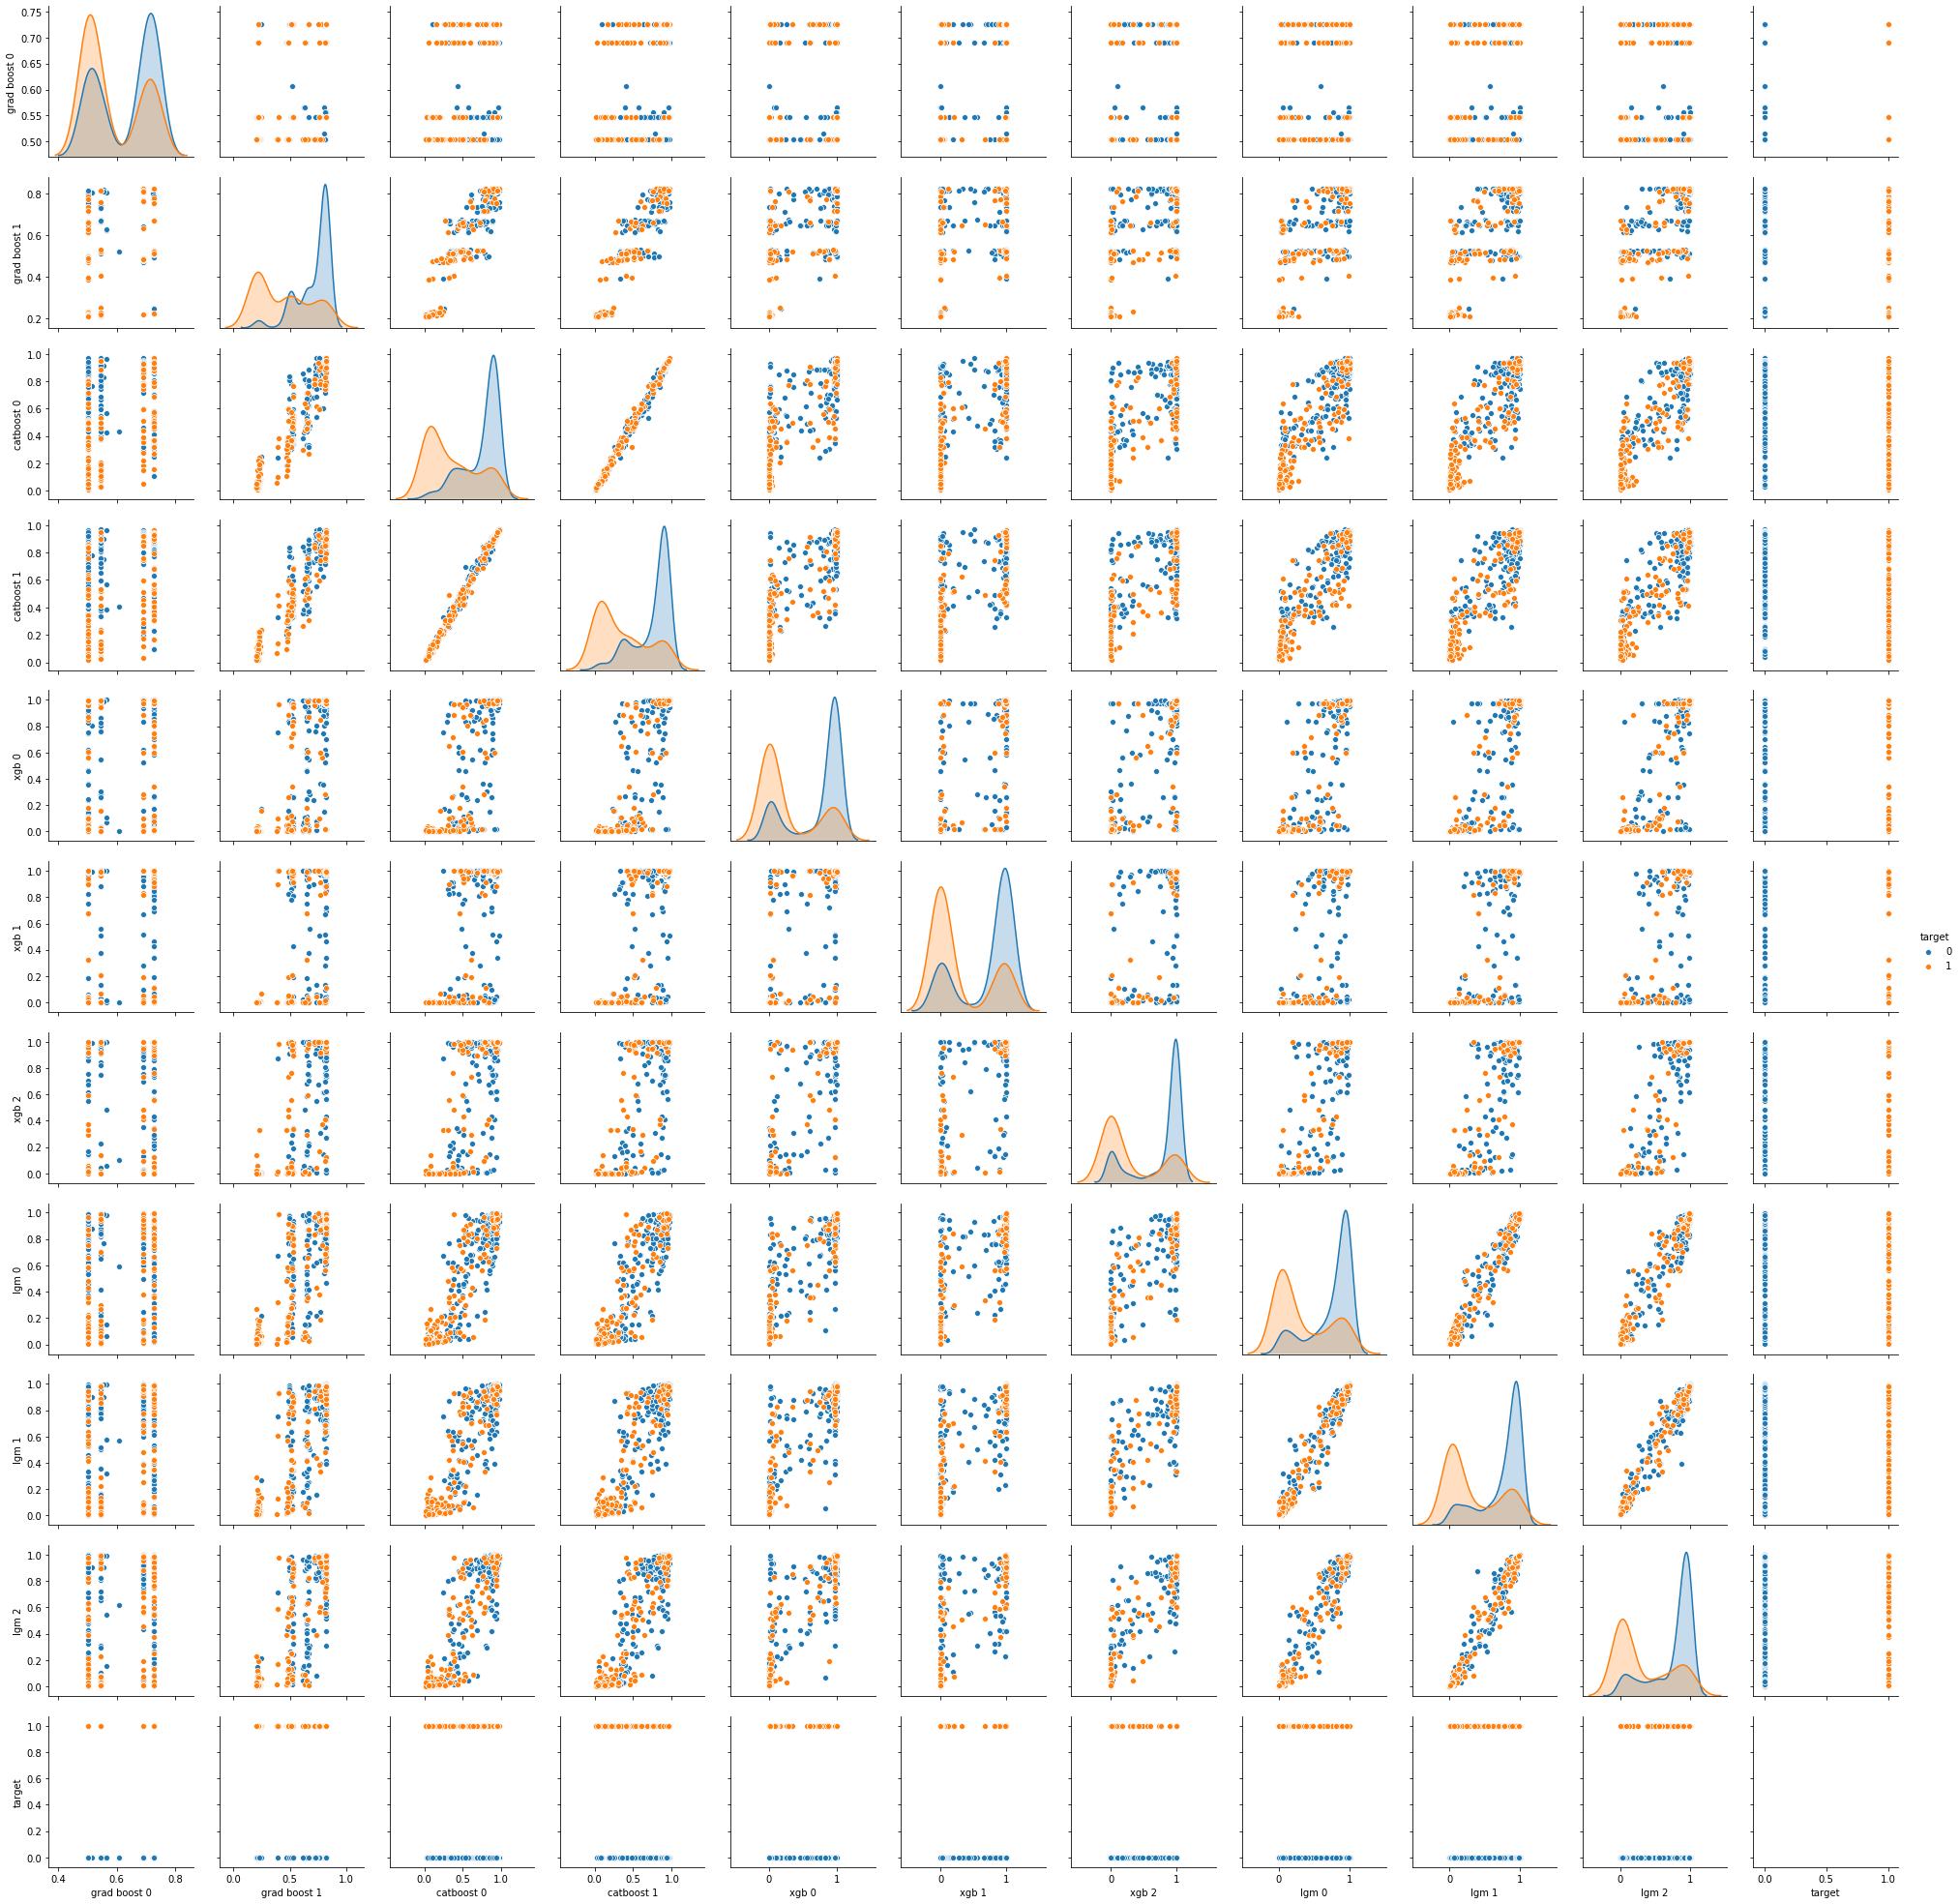

In [118]:
seaborn.pairplot(est.probs[0], hue = "target")

In [119]:
ac = []
for param in params[CatBoostClassifier]:
    param["class_weights"] = [1, 0.8]
    model = CatBoostClassifier(**param)
    model.fit(X_train, np.array(y_train), cat_features = cat_columns, 
             eval_set = (X_test, np.array(y_test)), plot = True, verbose = False)
    ac.append(accuracy_score(model.predict(X_test), np.array(y_test)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [120]:
ac

[0.7822966507177034,
 0.7894736842105263,
 0.80622009569378,
 0.7942583732057417,
 0.7942583732057417,
 0.7870813397129187]